## Data Science Tools 1 - Final Project ##
### Amy Schneider ###

---
### Section 1: Github Repository

https://github.com/maybeimamy/dst1_final_project

---
### Section 2: Dataset and Motivation

**Dataset Overview:**

- The [Mental Health Client-Level Data (MH-CLD) - 2020](https://www.datafiles.samhsa.gov/dataset/mental-health-client-level-data-2020-mh-cld-2020-ds0001) is a comprehensive dataset focusing on client-level mental health and treatment data collected from facilities reporting to individual state administrative data systems.

**Data Collection Method:**

- The data collection process involves SAMHSA, a federal agency in the United States, which annually releases a publicly available report. This report compiles mental health data from individuals receiving mental health treatment services provided or funded through state mental health agencies (SMHAs).

**Purpose of Collection:**

- This valuable dataset serves as a critical resource for policymakers, researchers, and mental health professionals. It enables them to assess the effectiveness of mental health services, identify trends and disparities, and develop evidence-based strategies to improve mental health care and address substance use challenges nationwide.

**Data Content:**

- The dataset includes information from both the Mental Health Client-Level Data (MH-CLD) and the Mental Health Treatment Episode Data Set (MH-TEDS). MH-CLD focuses on individual-level data, providing details on demographics, clinical characteristics, and mental health diagnoses.
- MH-TEDS, on the other hand, centers on treatment events such as admissions and discharges from service centers. It allows analysis at both the individual client and treatment episode levels, enhancing data reporting for individuals with co-occurring mental health and substance use disorders.
- MH-TEDS offers additional optional fields not available in MH-CLD, such as data on referral sources, criminal justice involvement, income sources, and health insurance.

**Limitations:**

- It's important to note that while the data in MH-CLD and MH-TEDS provide valuable insights, they do not encompass all individuals receiving mental health treatment services. There might be some gaps in the representation of the entire population seeking mental health support.

---
### Section 3: Research Question

**How can the Mental Health Client-Level Data (MH-CLD) - 2020 help individuals seeking mental health treatment?** This project aims to explore the most commonly diagnosed co-morbid mental health disorders based on demographic information like gender, age, race, and ethnicity; empowering mental health seekers by providing accessible information, enabling informed decisions for their care and support.

---
### Section 4: Literature Review

Numerous studies have explored mental health disorders and their prevalence among individuals seeking mental health treatment. McGuire and Miranda (2008) conducted research on mental health care disparities based on race and ethnicity, emphasizing their persistence and prevalence. They also examined the effectiveness of general health care policies in reducing these disparities and highlighted the importance of a diverse mental health workforce, provider and patient education, and quality improvement strategies.

In another study, Vaidyanathan, Patrick, and Iacono (2011) used latent class analysis to investigate patterns of comorbidity among common mental disorders. Their analysis of data from two nationally representative surveys revealed five distinctive latent classes with unique profiles of diagnostic comorbidity. This research provides valuable insights for diagnostic classification schemas and mental health treatment.

Meanwhile, Kruzan, Meyerhoff, Nguyen, Mohr, Reddy, and Kornfield (2022) suggested that online screeners can serve as a crucial transition point in young people's mental health journeys. Their study discusses design implications for online screeners, post-screener feedback, and digital interventions.

In contrast to existing research, this project offers a unique perspective by presenting the Mental Health Client-Level Data (MH-CLD) - 2020 from the viewpoint of clients rather than providers. Our goal is to democratize access to crucial information about commonly diagnosed co-morbid mental health disorders among individuals seeking mental health treatment. By empowering mental health seekers with this information, we enable them to make informed decisions about their care and support.

A key aspect of our work is the emphasis on utilizing demographic information, such as gender, age, race, and ethnicity, to uncover tailored and personalized approaches to mental health treatment. This focus on personalized care aligns with the growing need for patient-centered mental health services and complements the existing body of research, enriching our understanding of mental health challenges and fostering improved well-being for diverse populations.

**Bibliography:**

Kruzan KP, Meyerhoff J, Nguyen T, Mohr DC, Reddy M, Kornfield R. "I Wanted to See How Bad it Was": Online Self-screening as a Critical Transition Point Among Young Adults with Common Mental Health Conditions. Proc SIGCHI Conf Hum Factor Comput Syst. 2022 Apr;2022:328. doi: 10.1145/3491102.3501976. Epub 2022 Apr 29. PMID: 35531062; PMCID: PMC9075814.

McGuire TG, Miranda J. New evidence regarding racial and ethnic disparities in mental health: policy implications. Health Aff (Millwood). 2008 Mar-Apr;27(2):393-403. doi: 10.1377/hlthaff.27.2.393. PMID: 18332495; PMCID: PMC3928067.
   
Vaidyanathan U, Patrick CJ, Iacono WG. Patterns of comorbidity among mental disorders: a person-centered approach. Compr Psychiatry. 2011 Sep-Oct;52(5):527-35. doi: 10.1016/j.comppsych.2010.10.006. Epub 2010 Dec 15. PMID: 21111407; PMCID: PMC3110544.

---
### Section 5: Data Cleaning Discussion

**Data Cleaning/Type Conversion Discussion:**

In the Mental Health Client-Level Data (MH-CLD) - 2020 dataset, I encountered several challenges during the data cleaning and type conversion process. The dataset initially contained 6,945,521 rows and 40 columns of data, which was so large that I had to rely on BASH commands for direct interaction to prevent crashes. One of the crucial tasks was converting integer values in each column to their corresponding strings using an expansive codebook. This transformation was necessary to make the output data more accessible and interpretable.

**Handeling Missing Values:**

Handling missing values was of utmost importance to ensure the integrity of the data analysis. In the dataset, missing, unknown, not collected, or invalid data were represented by an integer value of -9. I applied specific strategies to deal with missing values for different columns:

- 'MH1' column: Rows with missing information in this column, indicating that the individual did not receive any diagnosis, were removed from the dataset as they were not relevant to the analysis.

- 'GENDER' column: Rows with missing gender information were also removed from the dataset since this information was essential for the analysis.

- 'AGE' column: I excluded rows with missing age data and also removed rows with age values representing minors, as the analysis focused solely on data related to adults.

- 'ETHNIC' and 'RACE' columns: Rows with missing information in both 'ETHNIC' and 'RACE' columns were removed. However, I retained rows that had information in at least one of these columns to avoid unnecessary data loss.

**New Features/Attribute Creation:**

To facilitate further analysis, I created two new attributes:

- 'ALL_DIAGNOSES': I merged the three mental health diagnoses (MH1, MH2, MH3) into a single attribute to study comorbidity rates. I handled missing values in these columns using the dropna function to ensure accurate consolidation.

- 'RACE/ETHNICITY': Considering the substantial amount of missing data in the 'RACE' and 'ETHNIC' columns, I combined the two attributes into a single one. This allowed for a more comprehensive view of the diversity spread in the DataFrame, and every row now contained at least one reported value.

By addressing missing values and introducing new attributes, the dataset became more refined, enabling more insightful data analysis and interpretation.

In [7]:
import os.path
import argparse
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
"""
HELPER FUNCTIONS
"""
## Merges columns based on range. Returns the updated dataframe.
def merge_columns(df, column_range):
    return df.loc[:, column_range].apply(
        lambda x: ', '.join(x.dropna().astype(str)),
        axis=1
    )

## Filters rows based on a condition. Returns the updated dataframe.
def filter_rows(df, condition):
    index = df[condition].index
    df.drop(index, inplace=True)

    return df

## Filters a dataframe by column value and data set. Returns the value counts.
def filtered_by(df, filter_value, column_value, data_set):
        return df[df['ALL_DIAGNOSES_SET'].isin(data_set) & (df[column_value] == filter_value)].value_counts()

## Generates a custom color palette. Returns a custom color palette.
def generate_custom_palette(sns, levels_per_column):
    num_colors = sum(levels_per_column)
    custom_palette = sns.color_palette('dark', n_colors=50)[:num_colors]
    return custom_palette

## Creates a stacked bar plot. Returns a stacked bar plot.
def plot_stacked_bar(df, title, column_prefix, levels_per_column, sns, plt):
    color_palette = generate_custom_palette(sns, levels_per_column)

    ax = df.plot(kind='bar', stacked=True, figsize=(12, 6), color=color_palette)
    ax.set_xlabel('Diagnosis')
    ax.set_ylabel('Count')
    ax.set_title(title, fontsize =14)

    # Move the legend further to the right
    legend_x = 1.75
    legend_y = 1.00
    ax.legend(title=column_prefix, loc='upper right', bbox_to_anchor=(legend_x, legend_y), ncol=1)

    ax.set_xticklabels(df.index, rotation=45, ha='right')

    return plt.show()

In [60]:
"""
CONSTANTS
"""
input_file_path = '~/Downloads/mhcld-puf-2020-csv.csv'

output_file = 'clean_data.csv'

column_names = ['AGE', 'ETHNIC', 'RACE', 'GENDER', 'MH1', 'MH2', 'MH3', 'STATEFIP', 'DIVISION']

age_codes = {
    4: '18-20 years',
    5: '21-24 years',
    6: '25-29 years',
    7: '30-34 years',
    8: '35-39 years',
    9: '40-44 years',
    10: '45-49 years',
    11: '50-54 years',
    12: '55-59 years',
    13: '60-64 years',
    14: '65 years and older',
    -9: None
}

ethnic_codes = {
    1: 'Mexican',
    2: 'Puerto Rican',
    3: 'Other Hispanic or Latino Origin',
    4: 'Not of Hispanic or Latino Origin',
    -9: None
}

race_codes = {
    1: 'American Indian/Alaska Native',
    2: 'Asian',
    3: 'Black or African American',
    4: 'Native Hawaiian or Other Pacific Islander',
    5: 'White',
    6: 'Some other race alone/two or more races',
    -9: None
}

gender_codes = {
    1: 'Male',
    2: 'Female',
    -9: None
}

mh_codes = {
    1: 'Trauma and stressor-related disorders',
    2: 'Anxiety disorders',
    3: 'Attention deficit/hyperactivity disorder (ADHD)',
    4: 'Conduct disorders',
    5: 'Delirium/dementia',
    6: 'Bipolar disorders',
    7: 'Depressive disorders',
    8: 'Oppositional defiant disorders',
    9: 'Pervasive development disorders',
    10: 'Personality disorders',
    11: 'Schizophrenia or other psychotic disorders',
    12: 'Alcohol or substance use disorders',
    13: 'Other disorders/conditions',
    -9: None
}

state_codes = {
    1: 'Alabama',
    2: 'Alaska',
    4: 'Arizona',
    5: 'Arkansas',
    6: 'California',
    8: 'Colorado',
    9: 'Connecticut',
    10: 'Delaware',
    11: 'District of Columbia',
    12: 'Florida',
    13: 'Georgia',
    15: 'Hawaii',
    16: 'Idaho',
    17: 'Illinois',
    18: 'Indiana',
    19: 'Iowa',
    20: 'Kansas',
    21: 'Kentucky',
    22: 'Louisiana',
    25: 'Massachusetts',
    26: 'Michigan',
    27: 'Minnesota',
    28: 'Mississippi',
    29: 'Missouri',
    30: 'Montana',
    31: 'Nebraska',
    32: 'Nevada',
    34: 'New Jersey',
    35: 'New Mexico',
    36: 'New York',
    37: 'North Carolina',
    38: 'North Dakota',
    39: 'Ohio',
    40: 'Oklahoma',
    41: 'Oregon',
    42: 'Pennsylvania',
    44: 'Rhode Island',
    45: 'South Carolina',
    46: 'South Dakota',
    47: 'Tennessee',
    48: 'Texas',
    49: 'Utah',
    50: 'Vermont',
    51: 'Virginia',
    53: 'Washington',
    55: 'Wisconsin',
    56: 'Wyoming',
    72: 'Puerto Rico',
    99: 'Other jurisdictions'
}

division_codes = {
    0: 'Other jurisdictions',
    1: 'New England',
    2: 'Middle Atlantic',
    3: 'East North Central',
    4: 'West North Central',
    5: 'South Atlantic',
    6: 'East South Central',
    7: 'West South Central',
    8: 'Mountain',
    9: 'Pacific'
}

cols_codes_mapping = {
    'AGE': age_codes,
    'ETHNIC': ethnic_codes,
    'RACE': race_codes,
    'GENDER': gender_codes,
    'MH1': mh_codes,
    'MH2': mh_codes,
    'MH3': mh_codes,
    'STATEFIP': state_codes,
    'DIVISION': division_codes,
}

gender_levels = ['Male', 'Female']
re_levels = ['Not of Hispanic or Latino Origin, Black or African American', 'Not of Hispanic or Latino Origin, Native Hawaiian or Other Pacific Islander', 'Not of Hispanic or Latino Origin, Asian', 'Not of Hispanic or Latino Origin, Some other race alone/two or more races', 'Other Hispanic or Latino Origin, American Indian/Alaska Native', 'Other Hispanic or Latino Origin, White', 'Not of Hispanic or Latino Origin, American Indian/Alaska Native', 'Other Hispanic or Latino Origin, Black or African American', 'Not of Hispanic or Latino Origin, White', 'Puerto Rican, Some other race alone/two or more races', 'Other Hispanic or Latino Origin, Some other race alone/two or more races', 'Puerto Rican, Black or African American', 'Mexican, Some other race alone/two or more races', 'Mexican, White', 'Puerto Rican, White', 'Other Hispanic or Latino Origin, Native Hawaiian or Other Pacific Islander', 'Other Hispanic or Latino Origin', 'Mexican, Black or African American', 'Mexican, American Indian/Alaska Native', 'Other Hispanic or Latino Origin, Asian', 'Mexican, Asian', 'Puerto Rican, Asian', 'Native Hawaiian or Other Pacific Islander', 'Mexican', 'American Indian/Alaska Native', 'Some other race alone/two or more races', 'Asian', 'Not of Hispanic or Latino Origin', 'White', 'Black or African American', 'Puerto Rican', 'Puerto Rican, American Indian/Alaska Native', 'Puerto Rican, Native Hawaiian or Other Pacific Islander', 'Mexican, Native Hawaiian or Other Pacific Islander']
age_levels = ['65 years and older', '25-29 years', '60-64 years', '55-59 years', '40-44 years', '45-49 years', '35-39 years', '30-34 years', '50-54 years', '21-24 years', '18-20 years']

breakout_info = {
        'GENDER': gender_levels,
        'RACE/ETHNICITY': re_levels,
        'AGE': age_levels
}

In [11]:
## Cleans the raw data with the option to write clean data to a CSV.
## Returns the dataframe to be used to Summarize the Stats and/or Generate Visualizations.
def clean_raw_data(write_to_csv):
    ## Create Dataframe with only applicable columns
    df = pd.read_csv(input_file_path, usecols=column_names)

    ## Filtering unusable or unnecessary data
    filter_rows(df, ((df['AGE'] == -9) | (df['AGE'] <= 3)))
    filter_rows(df, ((df['ETHNIC'] == -9) & (df['RACE'] == -9)))
    filter_rows(df, (df['GENDER'] == -9))
    filter_rows(df, (df['MH1'] == -9))

    ## Replace all codes to the mapped values
    for column, code in cols_codes_mapping.items():
        df[column] = df[column].replace(code)

    ## Rename columns
    df = df.rename(columns={'STATEFIP': 'STATE', 'DIVISION': 'CENSUS_DIVISION'})

    ## Merging all MH columns and merging 'ETHNIC' and 'RACE'
    df['ALL_DIAGNOSES'] = merge_columns(df, ['MH1', 'MH2', 'MH3'])
    df['RACE/ETHNICITY'] = merge_columns(df, ['ETHNIC', 'RACE'])

    ## Drop single instance rows after merge
    df.drop(columns=['ETHNIC', 'RACE', 'MH1', 'MH2', 'MH3'], inplace=True)

    ## Write to csv
    if write_to_csv:
        df.to_csv(output_file, index=False, chunksize=10000)

    return df

df = clean_raw_data(True)

In [79]:
## Summarizes the stats from the cleaned data.
## Returns a dictionary with pertinent data to run the visualizations
def summarize_stats(df):
    ## If no dataframe is provided, create one from the clean data output file
    df = pd.read_csv(output_file) if df is None else df

    ## Split the 'ALL_DIAGNOSES' column into individual diagnoses
    df['NUM_DIAGNOSES'] = df['ALL_DIAGNOSES'].str.split(', ').apply(lambda x: len(x))

    ## Find the top ten most common diagnoses with two or three diagnoses
    df['ALL_DIAGNOSES'] = df['ALL_DIAGNOSES'].str.split(', ').apply(
        lambda x: ', '.join(sorted(x)))

    top_ten_diagnoses = df[df['NUM_DIAGNOSES'].isin([2, 3])]['ALL_DIAGNOSES'].value_counts().head(10)

    ## Create summary dataframe
    summary_df = pd.DataFrame({'Diagnosis': top_ten_diagnoses.index, 'Count': top_ten_diagnoses.values}).reset_index(
        drop=True)

    num_diagnoses_counts = df['NUM_DIAGNOSES'].value_counts()
    
    print("\033[1mSummary Statistics:\033[0m")

    print("\n\033[1mComorbid Diagnoses Counts:\033[0m\n",
          num_diagnoses_counts, 
          "\n\n\033[1mInterpretation:\033[0m When analyzing the data on the number of times 1, 2, and 3 diagnoses were assigned, we can observe a general spread. However, in the next section, we will provide a visualization that offers a more comprehensive view.")

    print("\n\n\033[1mSummary DataFrame:\033[0m\n",
          summary_df,
         "\n\n\033[1mInterpretation:\033[0m In this Summary DataFrame, we present the top ten most frequently assigned co-morbid diagnoses. It becomes apparent that certain sets of diagnoses are frequently assigned together. This information is not commonly shared with individuals seeking treatment, but it is crucial for us to make it more readily available.")
    
    return {
        'df': df,
        'summary_df': summary_df,
        'top_ten_diagnoses': top_ten_diagnoses,
    }

summary_stats = summarize_stats(df)

Summary Statistics:

Comorbid Diagnoses Counts:
 1    2550312
2    1184789
3     360133
Name: NUM_DIAGNOSES, dtype: int64 

Interpretation: When analyzing the data on the number of times 1, 2, and 3 diagnoses were assigned, we can observe a general spread. However, in the next section, we will provide a visualization that offers a more comprehensive view.


Summary DataFrame:
                                            Diagnosis   Count
0            Anxiety disorders, Depressive disorders  272689
1  Depressive disorders, Trauma and stressor-rela...  103178
2               Anxiety disorders, Bipolar disorders   72009
3  Anxiety disorders, Depressive disorders, Traum...   56565
4   Depressive disorders, Other disorders/conditions   55868
5  Bipolar disorders, Trauma and stressor-related...   45582
6  Alcohol or substance use disorders, Depressive...   45447
7  Anxiety disorders, Trauma and stressor-related...   43750
8  Other disorders/conditions, Schizophrenia or o...   43310
9      Anx

### Section 6: Visualization

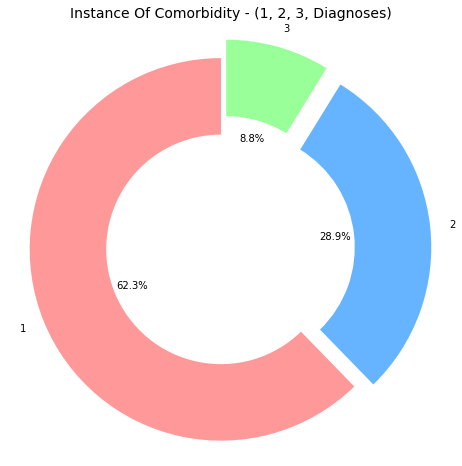

'Instance Of Comorbidity - (1, 2, 3 Diagnoses)' Discussion:

To ensure the relevance of the proposed research question, I first defined the standards of comorbidity that would be utilized throughout the rest of the project. The 'Instance Of Comorbidity' doughnut chart visualizes the number of individuals who received 1, 2, or 3 diagnoses when seeking treatment in 2020. We can observe that while the majority of individuals seeking treatment received only one diagnosis, approximately 40% were given two or three diagnoses. These are the individuals of interest for our research. It is worth noting that there were no outliers that had to be accounted for in this chart.

---------------------------------------------------------------------------------------------------------


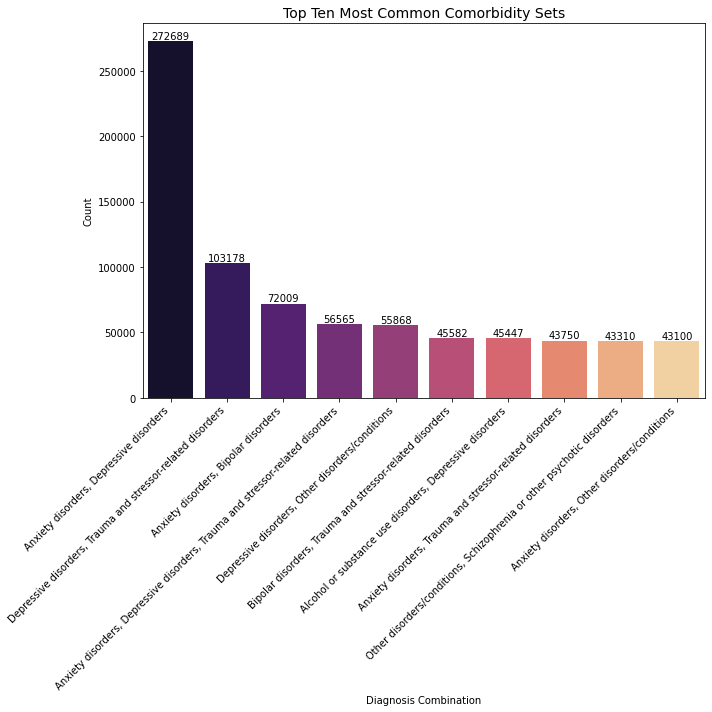

'Top Ten Most Common Comorbidity Sets' Discussion:

After narrowing down the data to include only individuals with 2 or 3 diagnoses, we focused on displaying only the top ten most frequent comorbidity sets. This chart visually represents the top ten most common diagnosis sets with their respective counts as vertical bars, each labeled with its count value. The bar colors are chosen from the 'magma' color palette, facilitating easy comparison of the frequencies of the top diagnoses and showing the trend of their occurrences over the data.

Independently, this chart provides individuals seeking treatment for an unknown mental health issue with a general idea of common comorbid diagnoses, helping them better prepare for and understand their future treatment processes. However, we aim to make this information more personally relevant by continuing to break down the data using our refined demographic information.

-----------------------------------------------------------------------------

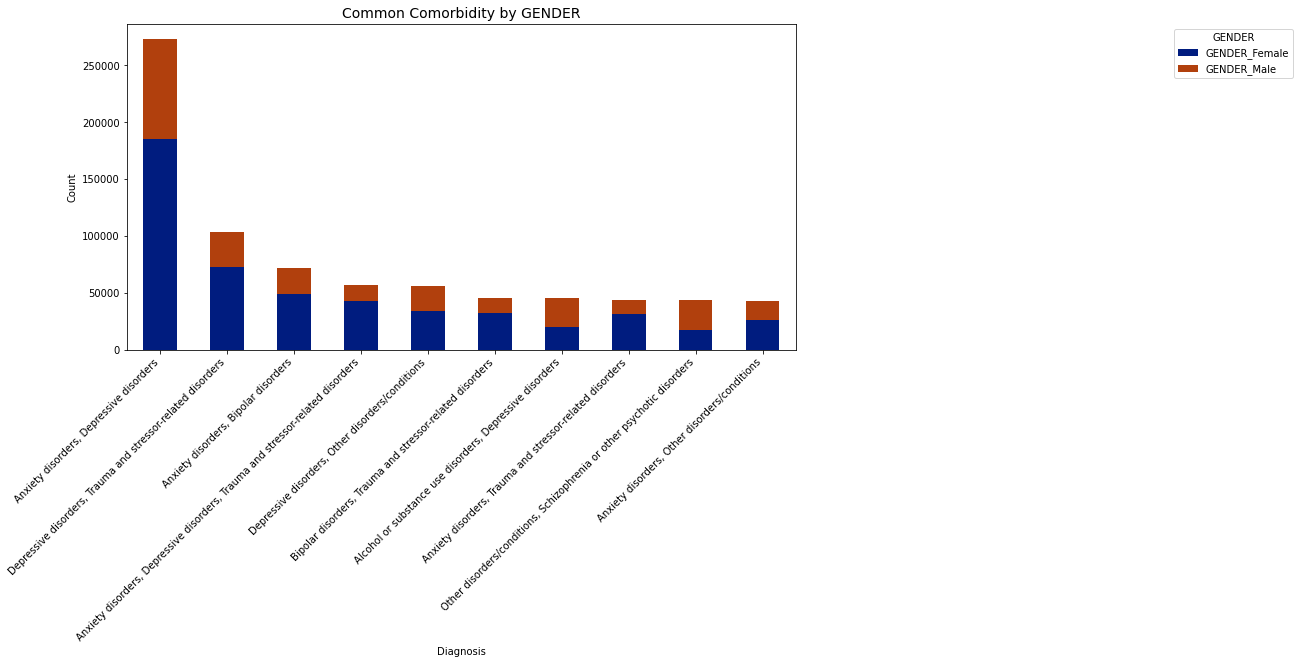

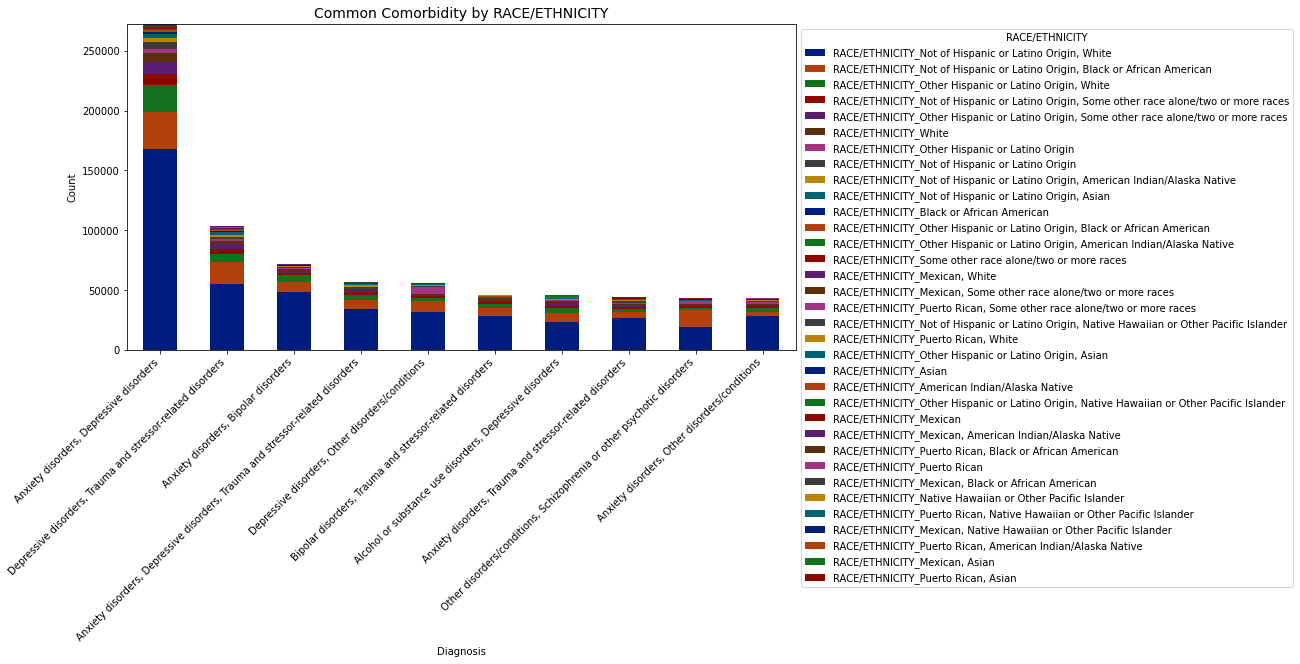

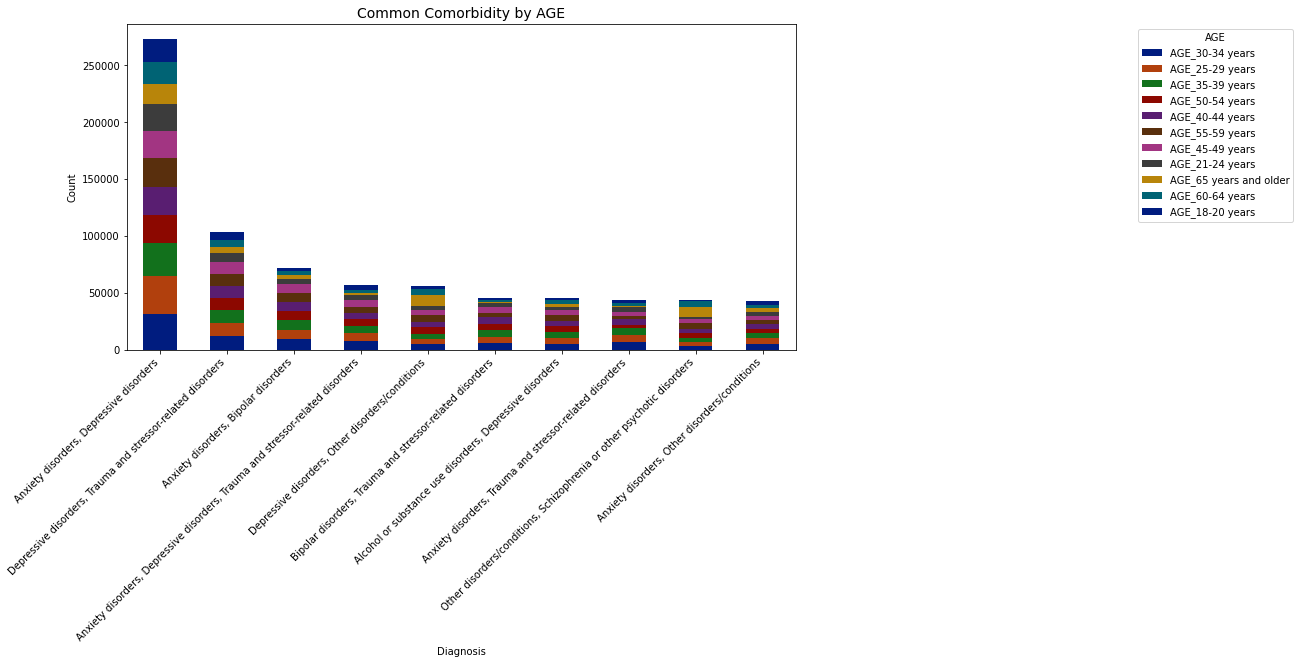


'Common Comorbidity by Gender' Discussion:

When we break out the top ten most common diagnosis sets by gender, two visible patterns are immediately apparent. The first observation is that the majority of diagnosis sets were assigned to women (as defined by GENDER=Female). This does not strictly imply that women are more likely to experience 2 or more mental health diagnoses than men, but rather that they are more likely to seek treatment for these issues and receive a diagnosis. The chart supports this assumption, as there was not a higher count of women compared to men in every diagnosis set. Notably, men make up the majority of 'Alcohol or substance use disorders, Depressive disorders,' and 'Other disorders/conditions, Schizophrenia or other psychotic disorders.' Regardless of gender, 'Anxiety disorders, Depressive disorders' are the most frequently assigned comorbidity set.

'Common Comorbidity by Ethnicity/Race' Discussion:

When Ethnicity and Race are broken out, we can see anot

In [80]:
## Generates 5 visualizations based on the summary stats.
def generate_visualizations(df, summary_stats):
    ## Summarize stats from clean data if summarize_stats has not run
    if df is None:
        df = pd.read_csv(output_file)

    if summary_stats is None:
        summary_stats = summarize_stats(df)

    top_ten_diagnoses = summary_stats['top_ten_diagnoses']
    num_diagnoses_counts = df['NUM_DIAGNOSES'].value_counts()
    summary_df = summary_stats['summary_df']

    ## Plot the doughnut chart of the diagnosis number frequency
    plt.figure(figsize=(8, 8))
    explode = [0, 0.1, 0.1]  # Explosion effect on the segments representing 2 and 3 diagnoses
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    plt.pie(num_diagnoses_counts, labels=num_diagnoses_counts.index, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops=dict(width=0.4), explode=explode, pctdistance=.5)
    plt.gca().add_artist(
        plt.Circle((0, 0), 0.3, color='white'))  # Draw a white circle in the middle to create the doughnut effect
    plt.title('Instance Of Comorbidity - (1, 2, 3, Diagnoses)', fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
    plt.show()
    
    print("\033[1m'Instance Of Comorbidity - (1, 2, 3 Diagnoses)' Discussion:\033[0m")

    print("\nTo ensure the relevance of the proposed research question, I first defined the standards of comorbidity that would be utilized throughout the rest of the project. The 'Instance Of Comorbidity' doughnut chart visualizes the number of individuals who received 1, 2, or 3 diagnoses when seeking treatment in 2020. We can observe that while the majority of individuals seeking treatment received only one diagnosis, approximately 40% were given two or three diagnoses. These are the individuals of interest for our research. It is worth noting that there were no outliers that had to be accounted for in this chart.")

    print("\n---------------------------------------------------------------------------------------------------------")

    ## Plot the top ten most common diagnoses as a bar plot with a trend line and custom colors
    plt.figure(figsize=(10, 10))
    ax = sns.barplot(x=top_ten_diagnoses.index, y=top_ten_diagnoses.values, palette='magma')
    ax.set_ylabel('Count')
    ax.set_xlabel('Diagnosis Combination')
    ax.set_title('Top Ten Most Common Comorbidity Sets', fontsize=14)

    ## Add count above each bar
    for index, value in enumerate(top_ten_diagnoses.values):
        ax.text(index, value, f'{value}', ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\033[1m'Top Ten Most Common Comorbidity Sets' Discussion:\033[0m")

    print("\nAfter narrowing down the data to include only individuals with 2 or 3 diagnoses, we focused on displaying only the top ten most frequent comorbidity sets. This chart visually represents the top ten most common diagnosis sets with their respective counts as vertical bars, each labeled with its count value. The bar colors are chosen from the 'magma' color palette, facilitating easy comparison of the frequencies of the top diagnoses and showing the trend of their occurrences over the data."
    "\n\nIndependently, this chart provides individuals seeking treatment for an unknown mental health issue with a general idea of common comorbid diagnoses, helping them better prepare for and understand their future treatment processes. However, we aim to make this information more personally relevant by continuing to break down the data using our refined demographic information.")

    print("\n---------------------------------------------------------------------------------------------------------")

    ## Initialize new columns with 0 for each combination of breakout column and level
    for column_name, levels in breakout_info.items():
        for level in levels:
            summary_df[f'{column_name}_{level}'] = 0

    ## Iterate through each diagnosis and update counts for each combination of breakout column and level
    for i, diag in enumerate(summary_df['Diagnosis']):
        filtered_df = df[df['ALL_DIAGNOSES'] == diag]
        for column_name, levels in breakout_info.items():
            for level in levels:
                count = len(filtered_df[(filtered_df[column_name] == level)])
                summary_df.at[i, f'{column_name}_{level}'] = count

    # Set diagnosis as index for plotting
    summary_df.set_index('Diagnosis', inplace=True)

    ## Create the levels_per_column list with the number of levels for each breakout column
    levels_per_column = [len(gender_levels), len(re_levels), len(age_levels)]

    ## Loop through each breakout column and create stacked bar plots with the custom color palette
    for column_name, levels in breakout_info.items():
        columns_to_plot = [col for col in summary_df.columns if col.startswith(f'{column_name}_')]
        columns_to_plot = sorted(columns_to_plot, key=lambda col: summary_df[col].sum(), reverse=True) # Sort columns based on the sum of their values
#         print(f"{column_name} Dataframe\n")
#         print(summary_df[columns_to_plot])
        plot_stacked_bar(summary_df[columns_to_plot], f'Common Comorbidity by {column_name}', column_name,
                         levels_per_column, sns, plt)

    print("\n\033[1m'Common Comorbidity by Gender' Discussion:\033[0m")

    print("\nWhen we break out the top ten most common diagnosis sets by gender, two visible patterns are immediately apparent. The first observation is that the majority of diagnosis sets were assigned to women (as defined by GENDER=Female). This does not strictly imply that women are more likely to experience 2 or more mental health diagnoses than men, but rather that they are more likely to seek treatment for these issues and receive a diagnosis. The chart supports this assumption, as there was not a higher count of women compared to men in every diagnosis set. Notably, men make up the majority of 'Alcohol or substance use disorders, Depressive disorders,' and 'Other disorders/conditions, Schizophrenia or other psychotic disorders.' Regardless of gender, 'Anxiety disorders, Depressive disorders' are the most frequently assigned comorbidity set.")

    print("\n\033[1m'Common Comorbidity by Ethnicity/Race' Discussion:\033[0m")

    print("\nWhen Ethnicity and Race are broken out, we can see another immediately noticeable pattern - the majority of our data set falls under the 'Not of Hispanic or Latino Origin, White' category. This group composes the majority of each of the top ten most common diagnosis sets. This trend implies a relatively homogenous grouping, making it difficult to interpret patterns found for the other 31 groupings.")

    print("\n\033[1m'Common Comorbidity by Age' Discussion:\033[0m")

    print("\nBreaking out by age shows no discernible pattern in the data, with the exception that individuals aged 65 and older compose a higher percentage of the 'Depressive disorders, Other disorders/conditions,' and 'Other disorders/conditions, Schizophrenia or other psychotic disorders' sets.")

    print("\n---------------------------------------------------------------------------------------------------------")

generate_visualizations(df, summary_stats)
    
## Runs everything
# df = clean_raw_data(True)
# summary_stats = summarize_stats(df)
# generate_visualizations(df, summary_stats)

### Conclusion

The personalized approach section of this project has provided valuable insights into comorbidity patterns specific to individuals with unique demographic information. Through the generation of visualizations based on summary statistics, we observed that while the majority of individuals seeking treatment received a single diagnosis, approximately 40% were diagnosed with two or three conditions, making them of particular interest for our research. Furthermore, the top ten most frequent comorbidity sets revealed certain combinations of diagnoses that are commonly assigned together. However, the personalized approach allowed us to go even further and explore specific comorbidity sets for an individual with particular demographic characteristics.

In [92]:
amy_demo = df[
    (df['RACE/ETHNICITY'] == 'Not of Hispanic or Latino Origin, White') &
    (df['GENDER'] == 'Female') &
    (df['AGE'] == '25-29 years') &
    (df['STATE'] == 'Colorado') &
    (df['CENSUS_DIVISION'] == 'Mountain') &
    (df['NUM_DIAGNOSES'] >= 2)
]

amy_top_five = amy_demo['ALL_DIAGNOSES'].value_counts().nlargest(5)

print("\n\033[1mThe top five comorbidity sets assigned to individuals with my exact demographic information:\033[0m\n")
print(amy_top_five)


The top five comorbidity sets assigned to individuals with my exact demographic information:

Anxiety disorders, Depressive disorders                                           155
Depressive disorders, Trauma and stressor-related disorders                        93
Alcohol or substance use disorders, Trauma and stressor-related disorders          71
Anxiety disorders, Depressive disorders, Trauma and stressor-related disorders     52
Bipolar disorders, Trauma and stressor-related disorders                           51
Name: ALL_DIAGNOSES, dtype: int64


For instance, we focused on myself - a non-Hispanic or Latino white female, aged 25-29 years, residing in Colorado within the Mountain census division. The top five comorbidity sets for my demographics were identified as 'Anxiety disorders and Depressive disorders', 'Depressive disorders and Trauma and stressor-related disorders', 'Alcohol or substance use disorders and Trauma and stressor-related disorders', 'Anxiety disorders, Depressive disorders, and Trauma and stressor-related disorders', and 'Bipolar disorders and Trauma and stressor-related disorders'.

This personalized analysis showcases the importance of considering demographic factors in understanding comorbidity patterns and tailoring treatments accordingly. By providing individuals seeking treatment with relevant information based on their specific demographics, we can enhance their understanding of common comorbidity sets and facilitate a more personalized approach to mental health care. This approach has the potential to empower individuals, mental health practitioners, and policymakers in making informed decisions to improve mental health outcomes for diverse populations.